<a href="https://colab.research.google.com/github/LestyMV/Global-CO2-Emissions/blob/main/Global_CO2_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
countries = tables[1]

# Rename columns
countries.columns = ['Country','Fossil CO2 emissions Mt CO2_1990','Fossil CO2 emissions Mt CO2_2005', 'Fossil CO2 emissions Mt CO2_2017',
                     'Fossil CO2 emissions_2007_% of world','Fossil CO2 emissions_2007vs1990 change %','2017 – Fossil CO2 emissions per land area',
                     '2017 – Fossil CO2 emissions per capita', '2018 CO2 emissions total including LUCF', '2018 CO2 emissions total excluding LUCF']

# Remove rows I don't care for
countries = countries.loc[3:]

# Set the country names as the index
countries = countries.set_index('Country')

countries



,Fossil CO2 emissions Mt CO2_1990,Fossil CO2 emissions Mt CO2_2005,Fossil CO2 emissions Mt CO2_2017,Fossil CO2 emissions_2007_% of world,Fossil CO2 emissions_2007vs1990 change %,2017 – Fossil CO2 emissions per land area,2017 – Fossil CO2 emissions per capita,2018 CO2 emissions total including LUCF,2018 CO2 emissions total excluding LUCF
Country,,,,,,,,,
Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...
Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31


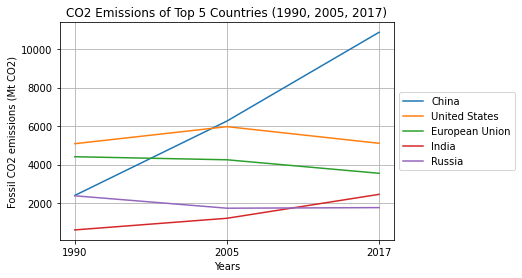

In [ ]:
#Graph 1: CO2 of the bigger countries
import matplotlib.pyplot as plt
countries_graph1= countries.drop(axis=1,columns=countries.columns[3:], inplace=False)

# Rename columns
countries_graph1.columns = ['1990','2005','2017']
rslt_df = countries_graph1.sort_values(by = '2017', axis = 0, ascending = False)
top_5= rslt_df.head(5)

# plot for top five

years = ['1990','2005','2017']
for country, row in top_5.iterrows():
  plt.plot(years, row, label=country[:])

# Plot the data

plt.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Fossil CO2 emissions (Mt CO2)')
plt.title('CO2 Emissions of Top 5 Countries (1990, 2005, 2017)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()





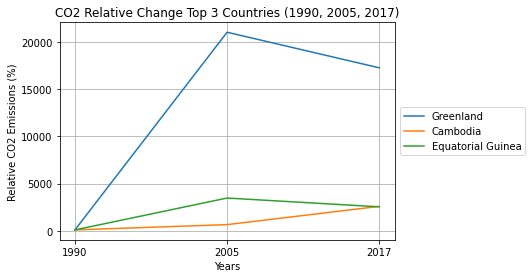

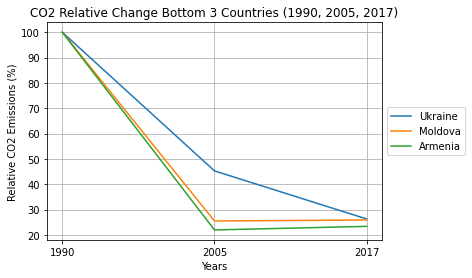

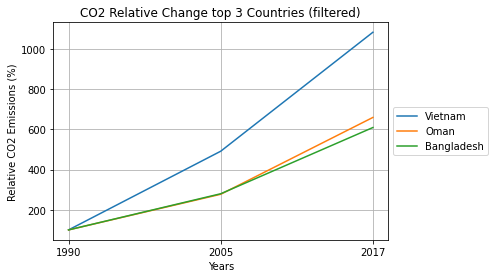

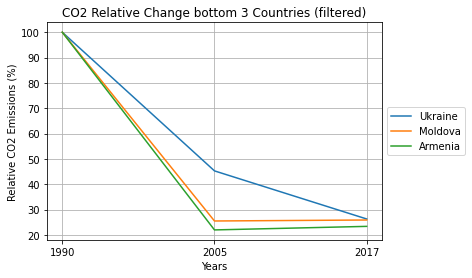

In [ ]:
#Graph 2: CO2 Relative Change Top 3 Countries
import matplotlib.pyplot as plt
countries_graph2= countries.drop(axis=1,columns=countries.columns[3:], inplace=False)

# Rename columns
countries_graph2.columns = ['1990','2005','2017']

# calculate relative change and add column
countries_graph2['Relative Change 1990'] = 100
countries_graph2['Relative Change 2005'] = ((countries_graph2['2005'] / countries_graph2['1990']) * 100)
countries_graph2['Relative Change 2017'] = ((countries_graph2['2017'] / countries_graph2['1990']) * 100)

# sort by relative change
df = countries_graph2.sort_values(by ='Relative Change 2017', axis = 0, ascending = False)


# select top and bottom three countries
top_three = df.head(3)
bottom_three = df.tail(3)

# plot for top three

x = ['1990','2005','2017']
for country, row in top_three.iterrows():
  plt.plot(x,row[-3:], label=country[:])

plt.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Relative CO2 Emissions (%)')
plt.title('CO2 Relative Change Top 3 Countries (1990, 2005, 2017)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()

# plot for bottom three

for country, row in bottom_three.iterrows():
  plt.plot(x,row[-3:], label=country[:])

plt.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Relative CO2 Emissions (%)')
plt.title('CO2 Relative Change Bottom 3 Countries (1990, 2005, 2017)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()


# Filtered Graph:

# select top and bottom three countries 
df_filtered = df[df['1990'] >= 5]
top_three_filtered = df_filtered.head(3)
bottom_three_filtered = df_filtered.tail(3)

# plot for top three
for country, row in top_three_filtered.iterrows():
  plt.plot(x,row[-3:], label=country[:])

plt.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Relative CO2 Emissions (%)')
plt.title('CO2 Relative Change Top 3 Countries (filtered)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()

# plot for bottom three

for country, row in bottom_three_filtered.iterrows():
  plt.plot(x,row[-3:], label=country[:])

plt.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Relative CO2 Emissions (%)')
plt.title('CO2 Relative Change Bottom 3 Countries (filtered)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()
